# Project: Section 4 | Classification | Creditworthiness

## Course: Business Analyst Nanodegree
## Student: Peter Jones
## Date: 2018.04.09

----

## Step 1: Business understanding

### What decision needs to be made?
The decision to be made here is to determine if a loan applicant is trustworthy or not.

### What data is needed to make this decision?
To build a model to assist in making this decision, data is needed on as many past loan approvals as possible, with as mmuch data on the customers as is feasible to collect and the outcome of whether the customer ended up being creditworthy or not.

### What kind of model (Continuous, Binary, Non-Binary, Time-Series) do we need to use to help make these decisions?
The outcome variable for these data is a binary value of creditworthy or not, so we would create binary models to help make this decision.

## Step 2: Building the training set

### Libraries

In [14]:
library( tidyverse )
require( PerformanceAnalytics )
library( caret )
library( Amelia )
library(randomForest)
library( rpart )
library( rpart.plot )
# library( reprtree )
library( reshape2 )
library( gbm )
library( pROC )

options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [15]:
df.train.raw <- readxl::read_excel( '../data/4_class/credit-data-training.xlsx' )
df.test.raw <- readxl::read_excel( '../data/4_class/customers-to-score.xlsx')

In [16]:
names( df.train.raw ) <- c( "application_result_txt"
                           , "acct_balance_txt"
                           , "months_of_credit_no"
                           , "prev_payment_status_txt"
                           , "purpose_txt"
                           , "credit_amt_no"
                           , "savings_stocks_val_no"
                           , "curr_employment_length_no"
                           , "installment_perc_no"
                           , "guarantors_txt"
                           , "curr_address_dur_no"
                           , "most_val_asset_cd"
                           , "age_no"
                           , "concurrent_credits_txt"
                           , "apartment_type_txt"
                           , "credits_at_bank_no"
                           , "occupation_txt"
                           , "dependents_no"
                           , "telephone_txt"
                           , "foreign_worker_flg" )

In [17]:
df.train.raw <- transform(  df.train.raw
                          , application_result_txt = factor( application_result_txt ) 
                          , acct_balance_txt = factor( acct_balance_txt )
                          , months_of_credit_no = months_of_credit_no
                          , prev_payment_status_txt = factor( prev_payment_status_txt )
                          , purpose_txt = factor( purpose_txt )
                          , credit_amt_no = credit_amt_no
                          , savings_stocks_val_no = factor( savings_stocks_val_no )
                          , curr_employment_length_no = factor( curr_employment_length_no )
                          , installment_perc_no = installment_perc_no
                          , guarantors_txt = factor( guarantors_txt )
                          , curr_address_dur_no = curr_address_dur_no
                          , most_val_asset_cd = factor( most_val_asset_cd )
                          , age_no = age_no
                          , concurrent_credits_txt = factor( concurrent_credits_txt )
                          , apartment_type_txt = factor( apartment_type_txt )
                          , credits_at_bank_no = factor( credits_at_bank_no )
                          , occupation_txt = factor( occupation_txt )
                          , dependents_no = dependents_no
                          , telephone_txt = factor( telephone_txt )
                          , foreign_worker_flg = factor( foreign_worker_flg )
                         )

In [18]:
facvar <- c( "application_result_txt"
           , "acct_balance_txt"
           , "prev_payment_status_txt"
           , "purpose_txt"
           , "savings_stocks_val_no"
           , "curr_employment_length_no"
           , "guarantors_txt"
           , "most_val_asset_cd"
           , "concurrent_credits_txt"
           , "apartment_type_txt"
           , "credits_at_bank_no"
           , "occupation_txt"
           , "telephone_txt"
           , "foreign_worker_flg" )

In [19]:
convar <- c( "months_of_credit_no"
           , "credit_amt_no"
           , "installment_perc_no"
           , "curr_address_dur_no"
           , "age_no"
           , "dependents_no" )

In [20]:
names( df.test.raw ) <- c(   "acct_balance_txt"
                           , "months_of_credit_no"
                           , "prev_payment_status_txt"
                           , "purpose_txt"
                           , "credit_amt_no"
                           , "savings_stocks_val_no"
                           , "curr_employment_length_no"
                           , "installment_perc_no"
                           , "guarantors_txt"
                           , "curr_address_dur_no"
                           , "most_val_asset_cd"
                           , "age_no"
                           , "concurrent_credits_txt"
                           , "apartment_type_txt"
                           , "credits_at_bank_no"
                           , "occupation_txt"
                           , "dependents_no"
                           , "telephone_txt"
                           , "foreign_worker_flg" )

In [21]:
df.test.raw <- transform(  df.test.raw
                          , acct_balance_txt = factor( acct_balance_txt )
                          , months_of_credit_no = months_of_credit_no
                          , prev_payment_status_txt = factor( prev_payment_status_txt )
                          , purpose_txt = factor( purpose_txt )
                          , credit_amt_no = credit_amt_no
                          , savings_stocks_val_no = factor( savings_stocks_val_no )
                          , curr_employment_length_no = factor( curr_employment_length_no )
                          , installment_perc_no = installment_perc_no
                          , guarantors_txt = factor( guarantors_txt )
                          , curr_address_dur_no = curr_address_dur_no
                          , most_val_asset_cd = factor( most_val_asset_cd )
                          , age_no = age_no
                          , concurrent_credits_txt = factor( concurrent_credits_txt )
                          , apartment_type_txt = factor( apartment_type_txt )
                          , credits_at_bank_no = factor( credits_at_bank_no )
                          , occupation_txt = factor( occupation_txt )
                          , dependents_no = dependents_no
                          , telephone_txt = factor( telephone_txt )
                          , foreign_worker_flg = factor( foreign_worker_flg )
                         )

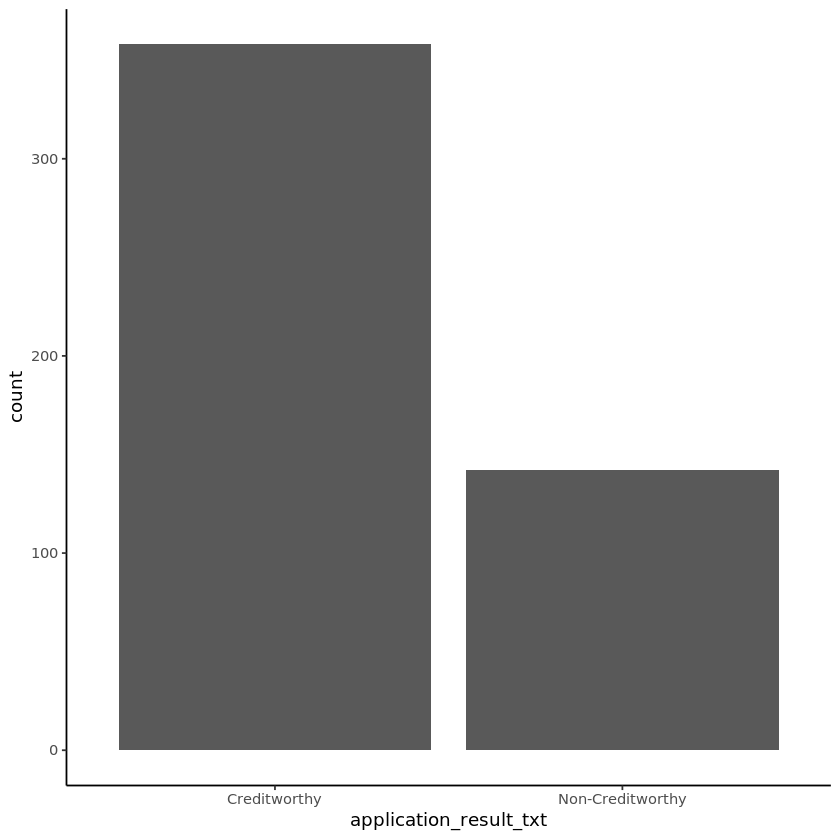

In [22]:
ggplot( df.train.raw, aes( x = application_result_txt ) ) +
    geom_bar( ) +
    theme_classic()

### Are any of your numerical data fields highly-correlated with each other?

Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a graphical parameter”Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a graphical parameter”Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a 

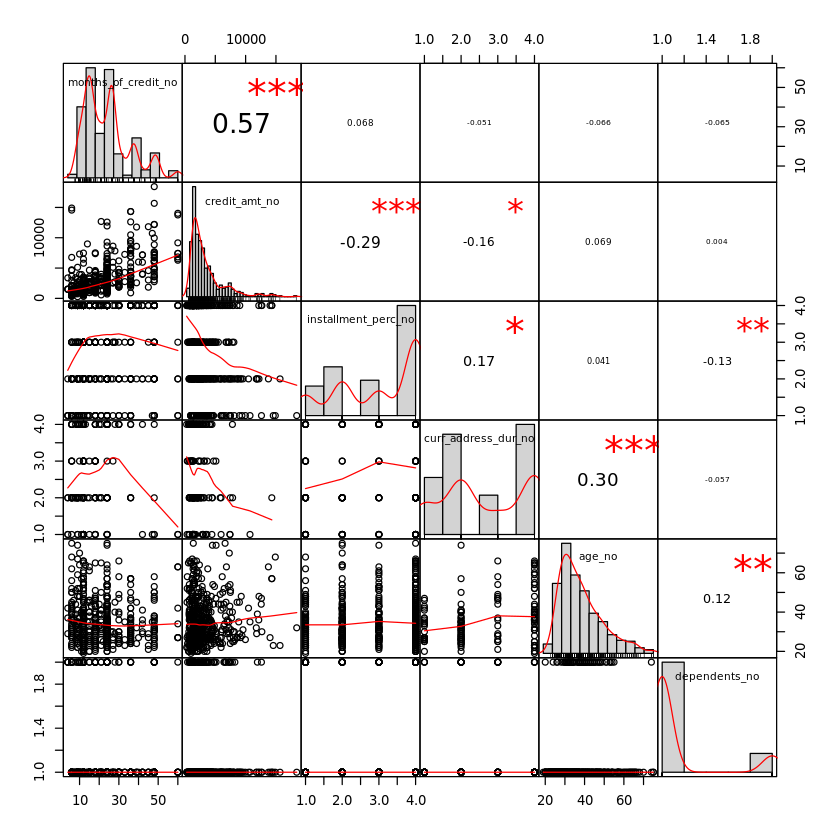

In [23]:
chart.Correlation( df.train.raw[,convar])

#### No variables reach the .7 threshold of being highly correlated, so all retained.

### Are there any missing data for each of the data fields?

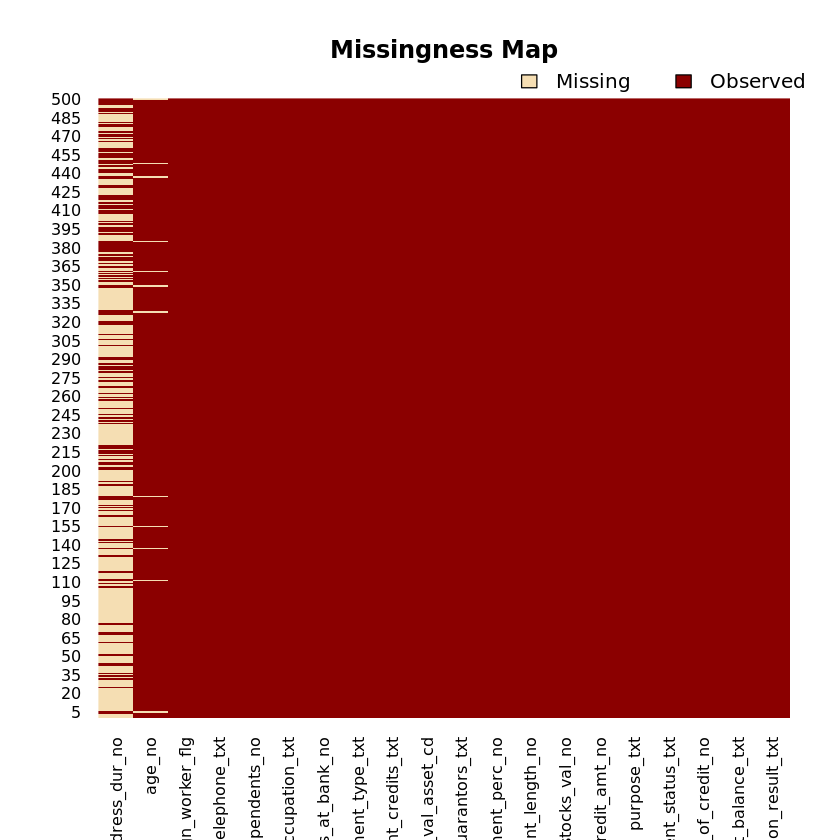

In [24]:
missmap( df.train.raw )

#### Removing address_dur_no due to missingness.

#### Impute missing values for age_no as median

In [25]:
df.train.raw[is.na( df.train.raw$age_no ),]$age_no <- median( df.train.raw$age_no, na.rm = TRUE )

### Are there only a few values in a subset of your data field? Does the data field look very uniform (there is only one value for the entire field?).

In [26]:
fac.check <- melt( df.train.raw[,facvar], 1 )

Warning message:
“attributes are not identical across measure variables; they will be dropped”

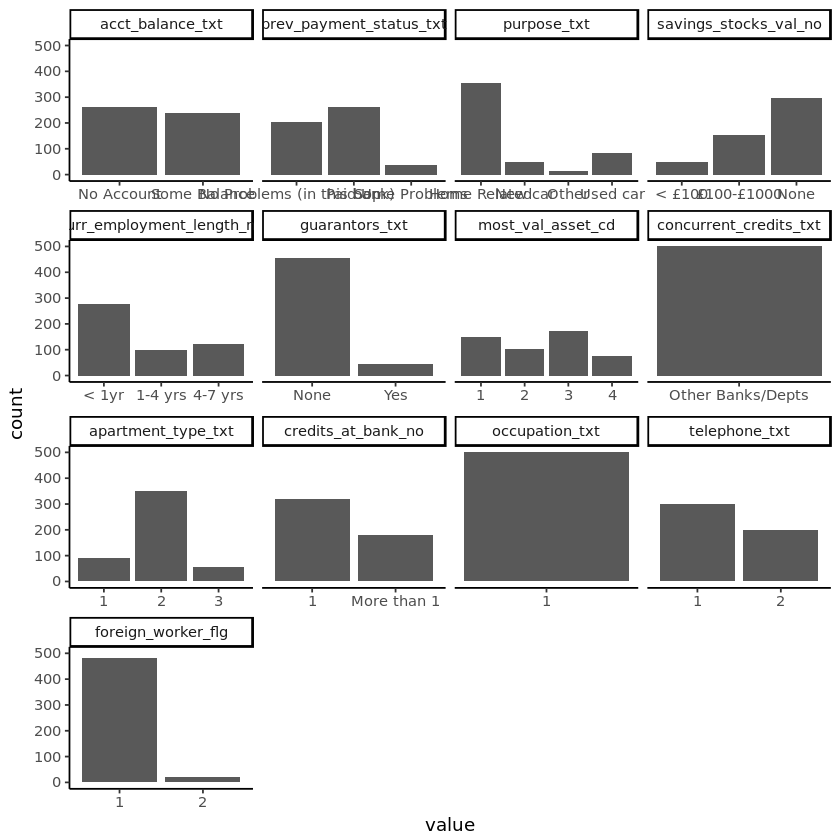

In [27]:
ggplot( fac.check, aes( x = value ) ) +
    geom_bar() +
    facet_wrap( ~variable, scales = "free_x" ) +
    theme_classic()

In [28]:
str( df.train.raw )

'data.frame':	500 obs. of  20 variables:
 $ application_result_txt   : Factor w/ 2 levels "Creditworthy",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ acct_balance_txt         : Factor w/ 2 levels "No Account","Some Balance": 2 2 2 2 1 2 1 1 1 2 ...
 $ months_of_credit_no      : num  4 4 4 4 6 6 6 6 6 6 ...
 $ prev_payment_status_txt  : Factor w/ 3 levels "No Problems (in this bank)",..: 2 2 1 1 2 1 3 2 2 2 ...
 $ purpose_txt              : Factor w/ 4 levels "Home Related",..: 3 1 1 1 1 1 1 1 1 1 ...
 $ credit_amt_no            : num  1494 1494 1544 3380 343 ...
 $ savings_stocks_val_no    : Factor w/ 3 levels "< £100","£100-£1000",..: 2 2 3 3 3 1 2 3 3 2 ...
 $ curr_employment_length_no: Factor w/ 3 levels "< 1yr","1-4 yrs",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ installment_perc_no      : num  1 1 2 1 4 4 4 3 3 2 ...
 $ guarantors_txt           : Factor w/ 2 levels "None","Yes": 1 1 1 1 1 1 1 1 2 1 ...
 $ curr_address_dur_no      : num  2 2 1 1 1 NA NA NA 3 4 ...
 $ most_val_asset_cd        : Factor w/ 4 l

- Removing duration at current address and dependents for missing data.
- Removing occupation_txt and concurrent_credits_txt for lack of information (1 value).
- Removing guarantors_txt, telephone_txt, and foreign_worker_flg due to low variablility.

In [29]:
df.train.raw <- df.train.raw %>%
    select( -telephone_txt ) %>%
    select( -curr_address_dur_no ) %>%
    select( -dependents_no ) %>%
    select( -occupation_txt ) %>%
    select( -concurrent_credits_txt ) %>%
    select( -foreign_worker_flg ) %>%
    select( -guarantors_txt )

- Removing records in the training set having a value of 'Other' due to test set not having that value.

In [30]:
df.train.raw <- droplevels( filter( df.train.raw
                                   , df.train.raw$purpose_txt != 'Other' ))

### Checking age value against the course information

In [31]:
round( mean( df.train.raw$age_no, na.rm = TRUE ) )

[1] 36

#### Looks good.

## Step 3: Train classification models

### Create training and validation sets

In [32]:
set.seed( 1 )

In [33]:
train <- createDataPartition( df.train.raw$application_result_txt
                             , times = 1
                             , p = 0.7
                             , list = FALSE )

In [34]:
df.train <- df.train.raw[train,]

In [35]:
df.val <- df.train.raw[-train,]

### Logistic regression

In [36]:
fit.glm.full <- glm( application_result_txt
              ~ .
              , data = df.train
              , family = binomial )

In [37]:
summary( fit.glm.full )


Call:
glm(formula = application_result_txt ~ ., family = binomial, 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2711  -0.7260  -0.4639   0.6474   2.4836  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -2.678e+00  9.981e-01  -2.683 0.007297 ** 
acct_balance_txtSome Balance         -1.051e+00  3.135e-01  -3.352 0.000804 ***
months_of_credit_no                   1.562e-02  1.419e-02   1.101 0.270850    
prev_payment_status_txtPaid Up        1.029e+00  4.198e-01   2.450 0.014271 *  
prev_payment_status_txtSome Problems  1.760e+00  5.599e-01   3.143 0.001671 ** 
purpose_txtNew car                   -2.295e+00  7.983e-01  -2.875 0.004044 ** 
purpose_txtUsed car                  -4.797e-01  3.954e-01  -1.213 0.225059    
credit_amt_no                         8.827e-05  6.548e-05   1.348 0.177669    
savings_stocks_val_no£100-£1000      -8.139e-02  5.946e-01  -

In [38]:
fit.glm.red <- glm( application_result_txt
              ~ acct_balance_txt
              + prev_payment_status_txt
                + credit_amt_no
                + installment_perc_no
                + most_val_asset_cd
                + curr_employment_length_no
              , data = df.train
              , family = binomial )

In [39]:
summary( fit.glm.red )


Call:
glm(formula = application_result_txt ~ acct_balance_txt + prev_payment_status_txt + 
    credit_amt_no + installment_perc_no + most_val_asset_cd + 
    curr_employment_length_no, family = binomial, data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3434  -0.7568  -0.5050   0.8104   2.4257  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -2.097e+00  5.594e-01  -3.749 0.000178 ***
acct_balance_txtSome Balance         -1.281e+00  2.883e-01  -4.445 8.77e-06 ***
prev_payment_status_txtPaid Up        6.749e-01  2.978e-01   2.266 0.023421 *  
prev_payment_status_txtSome Problems  1.528e+00  4.884e-01   3.128 0.001760 ** 
credit_amt_no                         9.280e-05  4.933e-05   1.881 0.059962 .  
installment_perc_no                   2.725e-01  1.300e-01   2.096 0.036043 *  
most_val_asset_cd2                    3.148e-01  3.969e-01   0.793 0.427722    
most_val_

In [40]:
df.val$pred <- predict( fit.glm.red
                       , df.val
                       , type = 'response' )

In [41]:
df.val<- within( df.val, {
    pred[pred >= 0.5] = 'Creditworthy'
    pred[pred< 0.5] = 'Non-Creditworthy'
})
df.val$pred <- factor( df.val$pred )

In [44]:
lr.cm <- confusionMatrix( df.val$application_result_txt
                , df.val$pred )

In [45]:
lr.cm$overall[1]

Accuracy 
0.2291667

In [46]:
lr.cm$table

                  Reference
Prediction         Creditworthy Non-Creditworthy
  Creditworthy                8               95
  Non-Creditworthy           16               25

### Decision tree model

In [47]:
fit.dt <- rpart( application_result_txt 
     ~ .
     , data = df.train )

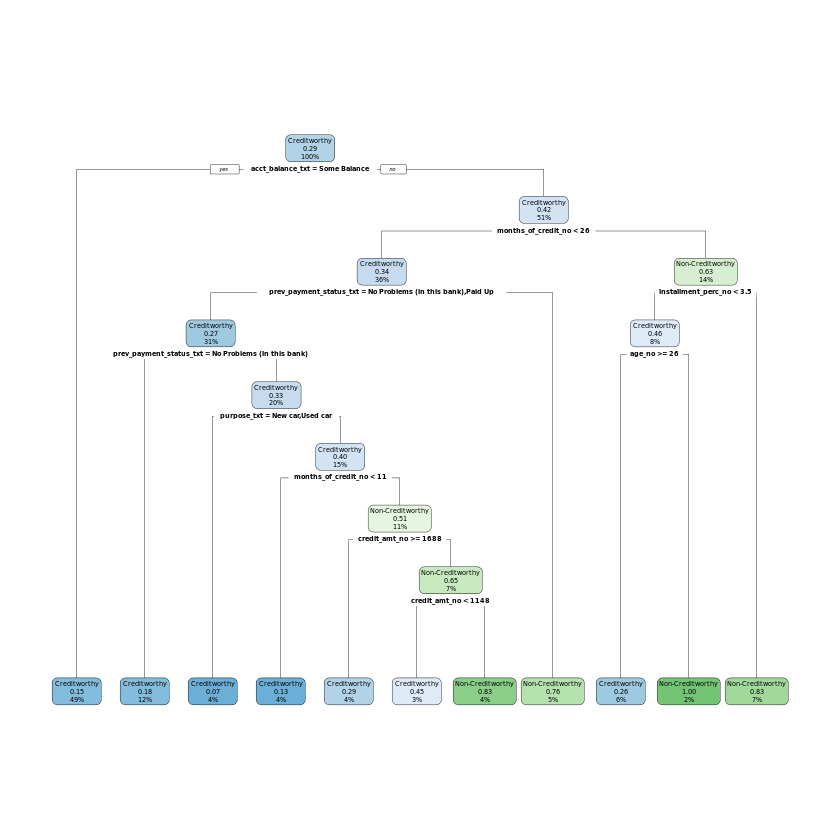

In [48]:
rpart.plot( fit.dt )

In [49]:
df.val$pred <- predict( fit.dt
       , df.val
       , type = 'class')

In [50]:
dt.cm <- confusionMatrix( df.val$application_result_txt
               , df.val$pred )

In [51]:
dt.cm$overall[1]

Accuracy 
0.7430556

In [52]:
dt.cm$table

                  Reference
Prediction         Creditworthy Non-Creditworthy
  Creditworthy               92               11
  Non-Creditworthy           26               15

### Random forest model

In [53]:
fit.rf <- randomForest( application_result_txt
            ~ .
            , data = df.train )

In [54]:
df.val$pred <- predict( fit.rf
       , df.val )

In [55]:
rf.cm <- confusionMatrix( df.val$application_result_txt
               , df.val$pred )

In [56]:
rf.cm$overall[1]

Accuracy 
0.7708333

In [57]:
rf.cm$table

                  Reference
Prediction         Creditworthy Non-Creditworthy
  Creditworthy               96                7
  Non-Creditworthy           26               15

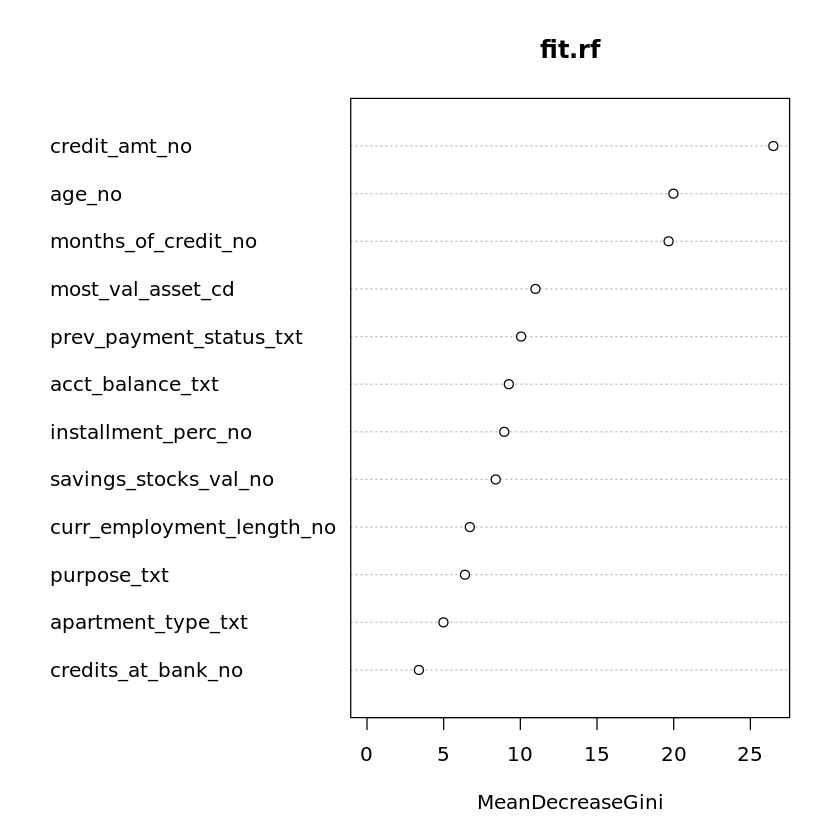

In [58]:
varImpPlot( fit.rf )

### Boosted tree model

In [59]:
fit.bm <- gbm( as.numeric( application_result_txt ) - 1
             ~ .
             , data = df.train
             , distribution = 'bernoulli'
             , n.trees = 70
             , interaction.depth = 5
             , shrinkage = 0.3
             , bag.fraction = 0.5
             , train.fraction = 1.0
             , n.cores = NULL)  #will use all cores by default

In [60]:
df.val$pred <- predict.gbm( fit.bm
       , df.val
       , n.trees = 70
       , type = 'response' )

In [61]:
df.val$bm.pred <- as.numeric( df.val$pred >= 0.4 )

In [62]:
df.val <- within( df.val, {
    pred[bm.pred == 1] = 'Non-creditworthy'
    pred[bm.pred == 0] = 'Creditworthy'
})
df.val$pred <- factor( df.val$pred )

,var,rel.inf
credit_amt_no,credit_amt_no,25.360854
age_no,age_no,15.915004
months_of_credit_no,months_of_credit_no,13.344722
prev_payment_status_txt,prev_payment_status_txt,8.136944
most_val_asset_cd,most_val_asset_cd,8.065190
acct_balance_txt,acct_balance_txt,7.229691
curr_employment_length_no,curr_employment_length_no,5.598544
purpose_txt,purpose_txt,5.277594
savings_stocks_val_no,savings_stocks_val_no,4.409289
installment_perc_no,installment_perc_no,3.865937


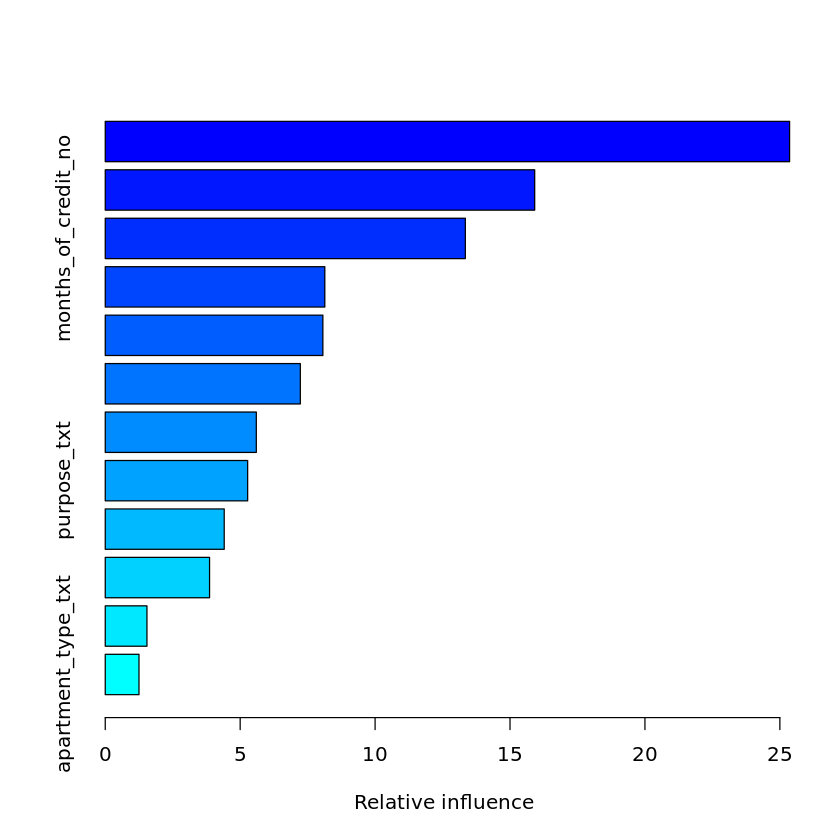

In [63]:
summary( fit.bm )

In [64]:
cm <- cbind(df.val$application_result_txt, df.val$pred)

In [65]:
bm.cm <- confusionMatrix( cm[,1], cm[,2] )

In [66]:
bm.cm$overall[1]

Accuracy 
0.7361111

In [67]:
bm.cm$table

          Reference
Prediction  1  2
         1 85 18
         2 20 21

### Compare the accuracy of the four models

In [68]:
ac.log <- c( 'Logistic regression', 0.2292 )
ac.dt <- c( 'Decision tree', 0.7431 )
ac.rf <- c( 'Random forest', 0.7639 )
ac.bm <- c( 'Gradient boosted model', 0.7083 )

In [69]:
ac.tbl <- rbind( ac.log
     , ac.dt
     , ac.rf
     , ac.bm )

In [70]:
ac.tbl

ac.log,Logistic regression,0.2292
ac.dt,Decision tree,0.7431
ac.rf,Random forest,0.7639
ac.bm,Gradient boosted model,0.7083


The random forest model appears to be the most accurate from a comparison of the confusion matrices.

### Which predictor variables are significant or the most important?

For the logistic regression model, the following variables were significant:
- Account balance
- Previous payment status
- Purpose
- Credit amount
- Installment percent
- Most valuable asset

For the decision tree model, the following variables were important:
- Account balance
- Months of credit
- Installment percent
- Previous payment status

For the random forest, the following variables were important:
- Credit amount
- Months of credit
- Age

For the boosted model, the following variables were important:
- Credit amount
- Months of credit
- Age

### What was the overall percent accuracy? Show the confusion matrix. Are there any biases seen in the model’s predictions? 
For all models, see the confusion matrices above.
- For the logistic regression model, overall accuracy was 23%. There is bias in this model with positive accuarcy of 33% and negative accuarcy of 21%.
- For the decision tree model, overall accuracy was 73%. There is bias in this model with positive prediction being 78% and negative accuracy at 58%.
- For the random forest model, overall accuracy was 78%. There is bias in this model with positive prediction at 79% and negative prediction at 65%.
- For the gradient boosted model, the overall accuracy was 72%. There is bias in this model with positive accuarcy of 81% and negative accurcacy of 

## Report

Random forest has the highest accuracy at 76%. I will use this model to score the new customers.

### Score the new data

In [71]:
df.test.raw <- df.test.raw %>%
    select( -curr_address_dur_no ) %>%
    select( -occupation_txt ) %>%
    select( -concurrent_credits_txt ) %>%
    select( -guarantors_txt ) %>%
    select( -foreign_worker_flg )

In [72]:
df.train$months_of_credit_no <- as.numeric( df.train$months_of_credit_no )
df.train$prev_payment_status_txt <- factor( df.train$prev_payment_status_txt )
df.train$credit_amt_no <- as.numeric( df.train$credit_amt_no )
df.train$savings_stocks_val_no <- factor( df.train$savings_stocks_val_no )
df.train$installment_perc_no <- as.numeric( df.train$installment_perc_no )
df.train$most_val_asset_cd <- factor( df.train$most_val_asset_cd )
df.train$age_no <- as.numeric( df.train$age_no )
df.train$apartment_type_txt <- factor( df.train$apartment_type_txt )

In [73]:
df.test.raw$pred <- predict( fit.rf, newdata = df.test.raw )

In [74]:
table( df.test.raw$pred )


    Creditworthy Non-Creditworthy 
             418               82 

## Write-up

To come up with this prediction, I split the training data into train and validation sets and ran four classification models on the train data. I then ran a comparison of all models on validation sets with an emphasis on accuracy (per requirements), and scored new customers with the most accurate model, the random forest.

This model had a 76% accuracy against the validation set.

In [75]:
pred.prob <- predict(fit.rf, df.val, type="prob")

In [76]:
df.val <- cbind( df.val, pred.prob )

In [77]:
roc.rf <- roc(df.val$application_result_txt, df.val$Creditworthy )

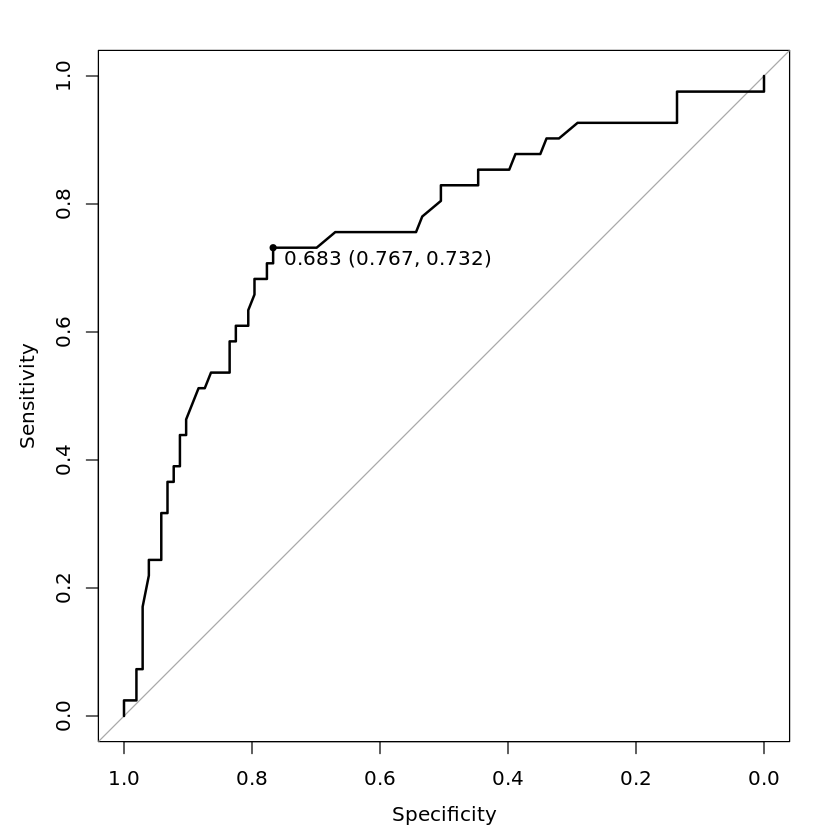

In [78]:
plot(roc.rf, print.thres="best", print.thres.best.method="closest.topleft")

## Conclusion
I predict that 417 new customers will be deemed creditworthy.